In [106]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import func_stat

In [107]:
### Create resid column ###
def residCol(df,colSpectrZ, colPhotoZ,colResid):
    df[colResid]=(df[colSpectrZ]-df[colPhotoZ])/(df[colSpectrZ]+1)
    return df

In [111]:
def plotBinnedStats(stats,estimators,residCols,binCol,labels=None):
    colorBlindPalette=['#000000','#E69F00','#009E73','#0072B2','#D55E00','#56B4E9','#F0E442','#CC79A7']
    fig, axs = plt.subplots(len(estimators), 1,figsize=(7,3*len(estimators)),sharey='row',sharex='col')
    if len(estimators)==1:
        axs=[axs]
        
    for i,est in enumerate(estimators):
        for j, c in enumerate(residCols):
            ax=axs[i]
            ax.grid(axis='y',linestyle ='--')
            ax.grid(axis='x',linestyle ='--')
            ax.set_ylabel(est+' resid_'+c,size=12)
            for k,(key,val) in enumerate(stats.items()):
                #m=len(colorBlindPalette)%(k+1)-1
                if labels==None:
                    label=key
                else:
                    label=labels[k]
                ax.plot(val['General']['binEdge'],val[c][est],
                               label=label,marker='o',markersize=10-2*k,c=colorBlindPalette[k])
            ax.legend()
    axs[i].set_xlabel(binCol,size=12)
    plt.tight_layout()
    return fig

In [108]:
dirCat=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\catalogs\forPaper\v05'
dirConfigs=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\configsArticle\Vis_UV_IR'
dirExp=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\experimentsArticle\Vis_UV_IR'
expNum=1
fileNameCat=r'05_COSMOS_SpectrZ_Zlim_1p2_AllBands_colors.csv'
idcolumn='Seq'
zspeccolumn='z_spec'
cat=pd.read_csv(os.path.join(dirCat,fileNameCat))

In [109]:
stats={}
datasets={}

In [110]:
df=None
expDirs=os.listdir(dirExp)
expDirs=[d for d in expDirs if int(d.replace('exp',''))<=10]
for dExp in expDirs:
    print(dExp)
    try:
        fname=next(f for f in os.listdir(os.path.join(dirExp,dExp)) if f.startswith('METAPHOR_testout'))
        df=pd.read_csv(os.path.join(dirExp,dExp,fname))
        df=residCol(df,colSpectrZ=zspeccolumn, colPhotoZ='zphoto',colResid='resid')
        datasets[dExp]=df
        stats[dExp]=func_stat.statByBins(df,binCol=zspeccolumn,residCols=['resid'])
    except:
        pass

exp001
exp003
exp004
exp005
exp006
exp007
exp008
exp009
exp010


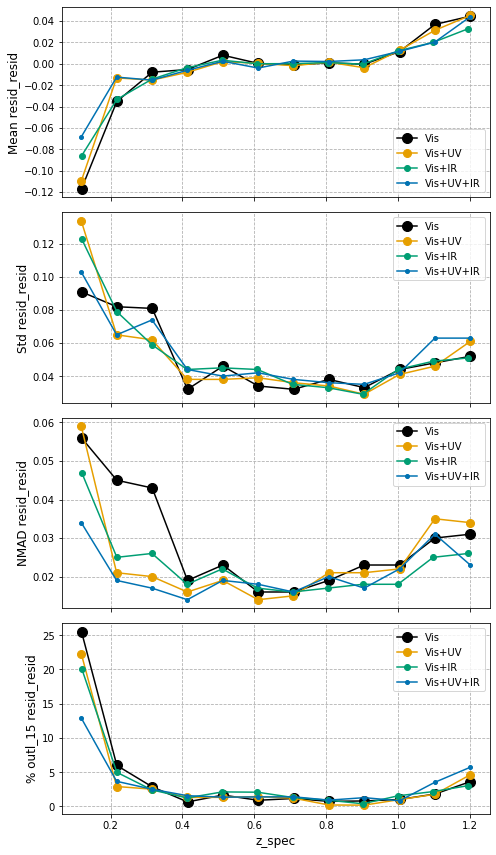

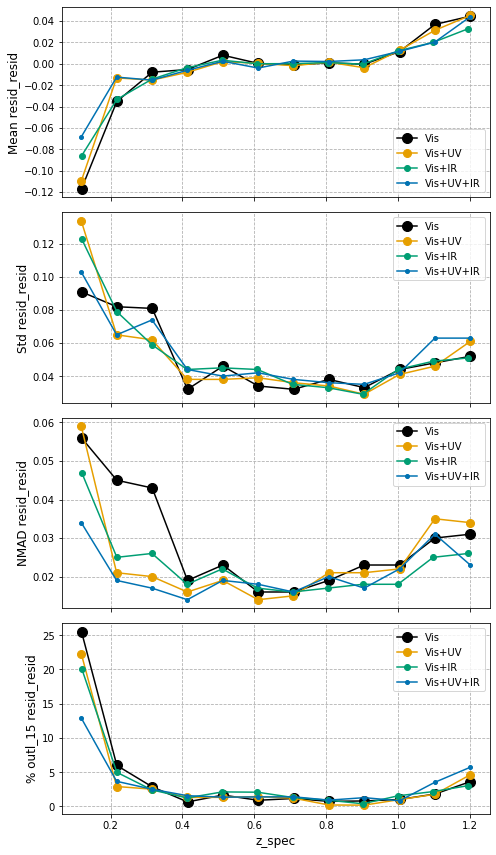

In [112]:
statsWork={key:val for key,val in stats.items() if key in('exp001','exp004','exp005','exp006')}
labels=['Vis','Vis+UV','Vis+IR','Vis+UV+IR']
plotBinnedStats(statsWork,estimators=['Mean','Std','NMAD','% outl_15'],residCols=['resid'],binCol=zspeccolumn,labels=labels)

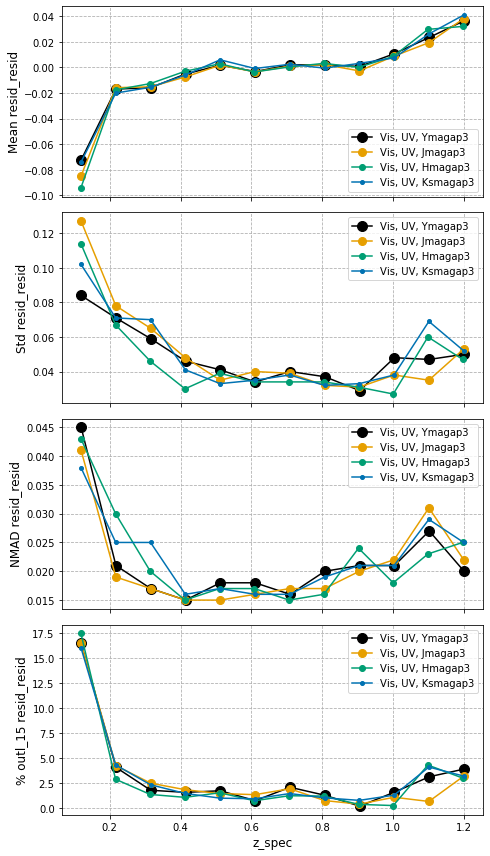

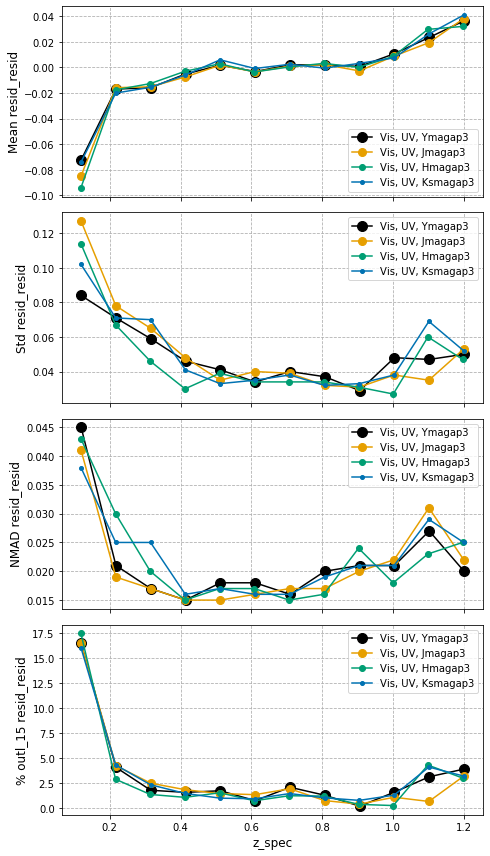

In [113]:
statsWork={key:val for key,val in stats.items() if key in('exp007','exp008','exp009','exp010')}
labels=['Vis, UV, Ymagap3','Vis, UV, Jmagap3','Vis, UV, Hmagap3','Vis, UV, Ksmagap3']
plotBinnedStats(statsWork,estimators=['Mean','Std','NMAD','% outl_15'],residCols=['resid'],binCol=zspeccolumn,labels=labels)

In [118]:
import configparser

In [119]:
dirConfigs=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\configsArticle\Vis_UV_IR'
labels=[]
for dExp in expDirs:
    conf=next(f for f in os.listdir(dirConfigs) if f.startswith(dExp))
    config = configparser.ConfigParser()
    config.read(os.path.join(dirConfigs,conf))
    labels.append(conf.split('colors_')[1].replace('.ini','').replace('_',', '))

In [120]:
labels

['Vis',
 'IR',
 'Vis, UV',
 'Vis, IR',
 'Vis, UV, IR',
 'Vis, UV, Ymagap3',
 'Vis, UV, Jmagap3',
 'Vis, UV, Hmagap3',
 'Vis, UV, Ksmagap3']

In [140]:
dfSDSSLike=pd.read_csv(os.path.join(r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\experimentsArticle\exp002',
                                    'METAPHOR_testout_05_COSMOS_SpectrZ_Zlim_1p2_AllBands_colors.csv'))
dfSDSSLike=residCol(dfSDSSLike,colSpectrZ=zspeccolumn, colPhotoZ='zphoto',colResid='resid')

In [160]:
datasetsWork={'Sdss':dfSDSSLike}
datasetsWork={**datasetsWork,**datasets}
labels=['SDSS-like']+labels

In [161]:
datasetsWork.keys()

dict_keys(['Sdss', 'exp001', 'exp003', 'exp004', 'exp005', 'exp006', 'exp007', 'exp008', 'exp009', 'exp010'])

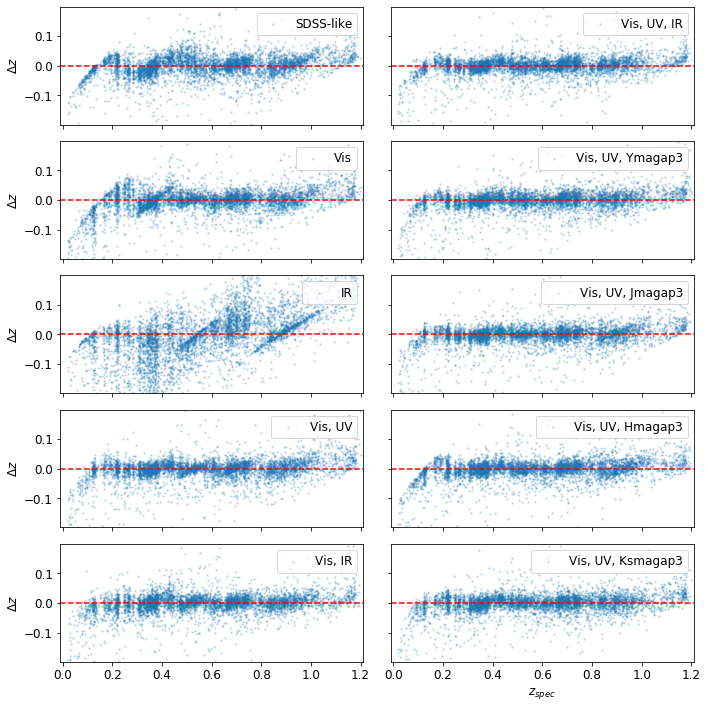

In [175]:
fig,axs=plt.subplots(5,2,figsize=(10,10),sharex='col',sharey='row')
plt.rcParams.update({'font.size': 12})

for i,(key,data) in enumerate(datasetsWork.items()):
    if i<5:
        j=0
        ii=i
    else:
        j=1
        ii=i-5
    ax=axs[ii][j]
    ax.scatter(data['z_spec'],data['resid'],s=2,label=labels[i],alpha=0.2)
    ax.legend(loc='upper right')
    ax.set_ylim(-0.198,0.198)
    ax.set_xlim(-0.01,1.21)
    axs[ii][0].set_ylabel('$\Delta z$')
    ax.axhline(0,color='r',linestyle='--')
ax.set_xlabel('$z_{spec}$')
plt.tight_layout()

In [183]:
import numpy as np

In [191]:
np.arange(0,1.3,step=0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2])

In [193]:
statsRanges={}
for i,(key,data) in enumerate(datasetsWork.items()):
    statsRanges[labels[i]]=func_stat.statByBins(data,binCol=zspeccolumn,residCols=['resid'],bins=np.arange(0,1.3,step=0.1))

In [197]:
statsRanges.keys()

dict_keys(['SDSS-like', 'Vis', 'IR', 'Vis, UV', 'Vis, IR', 'Vis, UV, IR', 'Vis, UV, Ymagap3', 'Vis, UV, Jmagap3', 'Vis, UV, Hmagap3', 'Vis, UV, Ksmagap3'])

In [200]:
df=pd.DataFrame(columns=['SDSS-like','Vis'])
df['SDSS-like']=statsRanges['SDSS-like']['resid']['NMAD']
df['Vis']=statsRanges['Vis']['resid']['NMAD']
df['diff']=df['SDSS-like']-df['Vis']

In [201]:
df

,SDSS-like,Vis,diff
0.1,0.034,0.062,-0.028
0.2,0.025,0.045,-0.02
0.3,0.034,0.038,-0.004
0.4,0.022,0.019,0.003
0.5,0.027,0.026,0.001
0.6,0.032,0.015,0.017
0.7,0.018,0.016,0.002
0.8,0.023,0.019,0.004
0.9,0.026,0.023,0.003
1.0,0.019,0.023,-0.004


In [214]:
df=pd.DataFrame(columns=['Vis','Vis, UV','Vis, IR', 'Vis, UV, Jmagap3'])
for c in df.columns:
    df[c]=statsRanges[c]['resid']['NMAD']
df['Vis-UV']=df['Vis']-df['Vis, UV']
df['Vis-IR']=df['Vis']-df['Vis, IR']
df['UV-IR']=df['Vis, UV']-df['Vis, IR']
df['(Vis, UV)-J']=df['Vis, UV']-df['Vis, UV, Jmagap3']

In [215]:
df.round(3)

,Vis,"Vis, UV","Vis, IR","Vis, UV, Jmagap3",Vis-UV,Vis-IR,UV-IR,"(Vis, UV)-J"
0.1,0.062,0.058,0.062,0.046,0.004,0,-0.004,0.012
0.2,0.045,0.023,0.024,0.02,0.022,0.021,-0.001,0.003
0.3,0.038,0.02,0.027,0.018,0.018,0.011,-0.007,0.002
0.4,0.019,0.016,0.018,0.015,0.003,0.001,-0.002,0.001
0.5,0.026,0.02,0.024,0.016,0.006,0.002,-0.004,0.004
0.6,0.015,0.013,0.017,0.015,0.002,-0.002,-0.004,-0.002
0.7,0.016,0.016,0.016,0.017,0,0,0,-0.001
0.8,0.019,0.019,0.016,0.016,0,0.003,0.003,0.003
0.9,0.023,0.021,0.018,0.021,0.002,0.005,0.003,0
1.0,0.023,0.022,0.018,0.021,0.001,0.005,0.004,0.001


In [206]:
df=pd.DataFrame(columns=['Vis','Vis, UV','Vis, IR'])
for c in df.columns:
    df[c]=statsRanges[c]['resid']['Mean']
df['Vis-UV']=df['Vis']-df['Vis, UV']
df['Vis-IR']=df['Vis']-df['Vis, IR']
df['UV-IR']=df['Vis, UV']-df['Vis, IR']

In [207]:
df

,Vis,"Vis, UV","Vis, IR",Vis-UV,Vis-IR,UV-IR
0.1,-0.1322,-0.1273,-0.1159,-0.0049,-0.0163,-0.0114
0.2,-0.0483,-0.0186,-0.0328,-0.0297,-0.0155,0.0142
0.3,-0.0057,-0.0152,-0.0183,0.0095,0.0126,0.0031
0.4,-0.0082,-0.0084,-0.005,0.0002,-0.0032,-0.0034
0.5,0.0075,0.0013,0.0029,0.0062,0.0046,-0.0016
0.6,0.0035,-0.0007,0.0006,0.0042,0.0029,-0.0013
0.7,-0.0024,-0.0015,-0.0005,-0.0009,-0.0019,-0.001
0.8,0.001,0.0009,0.0014,0.0001,-0.0004,-0.0005
0.9,-0.0007,-0.0033,-0.0006,0.0026,-0.0001,-0.0027
1.0,0.0108,0.0126,0.0121,-0.0018,-0.0013,0.0005
